### Template for NLP project

The aim of the project is to achieve the following:
 - Train a neural network that is **at least better than random guessing** on your dataset. The template contains the IMDB dataset for sentiment analysis, however, you can choose any other language related data set with the appropriate NLP task.
 - Investigate different neural network architectures (different hyperparameters, different layers, different pre-processing). Explain in the presentation, why the final network was selected! **Do not rely on black-box mechanisms.**
 

In [1]:
# tensorflow modules
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LayerNormalization, LSTM, Dropout


from tensorflow.keras.optimizers import Adam
import tensorflow
import matplotlib.pyplot as plt
# if you have installed a different version, replace 'r2.6'  with your version in links provided below
print(tensorflow.__version__)

2.9.0


In [2]:
# load imdb dataset
# links to dataset
# original dataset: https://ai.stanford.edu/~amaas/data/sentiment/
# version in tensorflow: https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/imdb

# select your vocabulary size
vocabularySize = 5000
# load data (it is already pre-processed)
# optional: add other pre.processing steps like stopword removal
(xTrain, yTrain), (xTest, yTest) = imdb.load_data(num_words=vocabularySize)
print('Loaded dataset with {} training samples, {} test samples'.format(len(xTrain), len(xTest)))

# look at the data
print('---review---')
print(xTrain[123])
print(xTrain[124])
print('---label---')
print(yTrain[123])

# look at the respective words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in xTrain[123]])


# other related dataset already in tensorflow:  reuters newswire classification dataset
# see https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/reuters

Loaded dataset with 25000 training samples, 25000 test samples
---review---
[1, 307, 5, 1301, 20, 1026, 2511, 87, 2775, 52, 116, 5, 31, 7, 4, 91, 1220, 102, 13, 28, 110, 11, 6, 137, 13, 115, 219, 141, 35, 221, 956, 54, 13, 16, 11, 2714, 61, 322, 423, 12, 38, 76, 59, 1803, 72, 8, 2, 23, 5, 967, 12, 38, 85, 62, 358, 99]
[1, 518, 12, 304, 6, 22, 231, 1300, 40, 2, 8, 721, 15, 1727, 117, 142, 15, 955, 2, 5, 2, 2, 15, 2, 6, 87, 20, 42, 6, 87, 229, 83, 6, 991, 31, 18, 4, 2088, 10, 10, 45, 24, 43, 15, 1660, 4669, 65, 47, 195, 3549, 5, 2, 231, 12, 878, 18, 60, 4, 91, 2, 7, 907, 8, 717, 2304, 60, 711, 309, 161, 2396, 38, 78, 45, 89, 2, 2, 4669, 2518, 89, 29, 2, 4, 1511, 83, 268, 58, 15, 2, 4, 3537, 199, 6, 1114, 2, 5, 6, 2, 2, 11, 940, 10, 10, 2, 717, 2, 136, 9, 17, 633, 1307, 4, 20, 4608, 19, 6, 2, 2455, 4764, 1062, 60, 151, 45, 1082, 702, 885, 2699, 1993, 5, 12, 2, 33, 57, 329, 74, 2, 234, 4, 370, 2, 143, 4, 2, 2, 7, 4, 4909, 1455, 40, 12, 9, 49, 243, 7, 2, 2, 2, 18, 4665, 2, 2, 665, 2, 4, 2, 

# Preprocessing

In [3]:
from nltk.corpus import stopwords

In [4]:
#load Stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

{"should've", 'above', 'only', 'their', "hasn't", "she's", 'and', 'be', 'haven', 'which', 'ma', "it's", 'has', 'not', "you're", 'd', 'of', 'under', 'whom', 'hers', "needn't", 'its', 'm', 'do', "mustn't", 's', "doesn't", 'have', 'them', 'myself', 'each', 've', 'mightn', 'at', 'as', 'to', 'we', 'weren', 'how', "isn't", 'between', 'once', "shan't", 'wasn', 'himself', 're', 'doing', 'yourselves', 'i', "mightn't", 'in', 'before', 'than', 'having', 'does', 'hasn', 'but', 'his', 't', "don't", 'aren', 'ourselves', "won't", 'own', 'on', 'or', 'why', "weren't", 'didn', 'won', 'shan', 'a', 'were', 'themselves', "didn't", 'through', 'down', 'you', 'yours', 'our', 'few', 'couldn', 'over', 'again', "wasn't", 'by', 'what', 'an', 'her', 'after', 'against', 'below', 'theirs', 'will', 'most', 'should', 'can', 'that', 'the', 'shouldn', 'did', 'where', 'so', 'am', 'more', 'during', 'now', 'because', 'herself', "you've", 'mustn', 'needn', 'wouldn', 'been', 'was', 'him', 'ain', 'those', 'they', 'until', 'th

In [5]:
stopWordNumbers = []

for word in stopWords:
    stopwordId = word2id.get(word, 0)
    stopWordNumbers.append(stopwordId)

print(stopWordNumbers)

[5460, 749, 61, 65, 1478, 439, 2, 27, 19932, 60, 8634, 42, 44, 21, 332, 1092, 4, 464, 934, 6139, 12421, 91, 1980, 78, 24007, 587, 149, 25, 95, 543, 254, 13340, 0, 30, 14, 5, 72, 0, 86, 215, 197, 277, 24086, 29877, 306, 793, 396, 9888, 10, 52778, 8, 156, 71, 257, 124, 41026, 18, 24, 827, 89, 0, 3144, 525, 202, 20, 39, 135, 1170, 15496, 1196, 41501, 3, 68, 530, 158, 140, 177, 22, 6444, 260, 168, 26232, 117, 171, 283, 31, 48, 32, 38, 100, 426, 1905, 9127, 77, 88, 141, 67, 12, 1, 0, 119, 118, 35, 241, 50, 312, 147, 85, 762, 871, 0, 0, 39964, 74, 13, 87, 0, 145, 33, 363, 11, 1558, 8725, 882, 58, 11292, 126, 56, 0, 29, 40, 92, 66, 134, 5132, 130, 36, 20830, 771, 96, 43, 9540, 82, 710, 621, 26, 16, 196, 9, 47, 1387, 41, 15, 6, 54, 69, 23, 1034, 52, 169, 583, 46, 1613, 20781, 1601, 423, 45, 53, 34, 487, 1866, 80, 98, 109, 138, 51, 407, 131, 122]


In [6]:
print(len(xTrain))
print(len(xTrain[0]))

25000
218


In [7]:

#for review in xTrain:
def removeStopWordsSpace(minValue, maxValue):
    removedWords = 0
    counter = minValue

    while counter <= maxValue:
        #print("StartLen:",len(xTrain[counter]))
        for word in xTrain[counter]:
            if word in stopWordNumbers:
                xTrain[counter].remove(word)
                removedWords+=1
        #print("EndLine:", len(xTrain[counter]))
        counter+=1
    return removedWords

def remvoeStopWords():
    print("Remove Words")
    startSpace = 0
    endSpace = 999
    while endSpace <= 25000:
        removedWords = removeStopWordsSpace(startSpace, endSpace)
        startSpace+=1000
        endSpace+=1000
        print("Step start:", startSpace, ", End:", endSpace, ", RemovedWords: ", removedWords)

remvoeStopWords()


#print("xTrain: len: ", len(xTrain[123], ", words:", xTrain[123])
        

Remove Words
Step start: 1000 , End: 1999 , RemovedWords:  88135
Step start: 2000 , End: 2999 , RemovedWords:  85981
Step start: 3000 , End: 3999 , RemovedWords:  89561
Step start: 4000 , End: 4999 , RemovedWords:  90407
Step start: 5000 , End: 5999 , RemovedWords:  85889
Step start: 6000 , End: 6999 , RemovedWords:  83455
Step start: 7000 , End: 7999 , RemovedWords:  84079
Step start: 8000 , End: 8999 , RemovedWords:  86079
Step start: 9000 , End: 9999 , RemovedWords:  82952
Step start: 10000 , End: 10999 , RemovedWords:  85457
Step start: 11000 , End: 11999 , RemovedWords:  83881
Step start: 12000 , End: 12999 , RemovedWords:  83455
Step start: 13000 , End: 13999 , RemovedWords:  85520
Step start: 14000 , End: 14999 , RemovedWords:  89032
Step start: 15000 , End: 15999 , RemovedWords:  88430
Step start: 16000 , End: 16999 , RemovedWords:  84654
Step start: 17000 , End: 17999 , RemovedWords:  85100
Step start: 18000 , End: 18999 , RemovedWords:  85459
Step start: 19000 , End: 19999 , 

In [8]:
imdb

<module 'keras.api._v2.keras.datasets.imdb' from 'C:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\imdb\\__init__.py'>

In [9]:
# get properties of the dataset
print('Maximum train review length: {}'.format(len(max(xTrain, key=len))))
print('Maximum test review length: {}'.format(len(max(xTest, key=len))))
print('Minimum train review length: {}'.format(len(min(xTrain, key=len))))
print('Minimum test review length: {}'.format(len(min(xTest, key=len))))

Maximum train review length: 1566
Maximum test review length: 2315
Minimum train review length: 6
Minimum test review length: 7


In [10]:
# select maximum number of words as input lengt
# pad or truncated (this is done automatically) your data
maxWords = 1000
xTrain = sequence.pad_sequences(xTrain, maxlen=maxWords)
xTest = sequence.pad_sequences(xTest, maxlen=maxWords)

In [11]:
# # setup the neural network architecture
# # check out the respective tensorflow help page: https://www.tensorflow.org/guide/keras/rnn
# model=Sequential()

# # define size of embedding, see https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/Embedding
# # optional: use a different embedding like word2vec or other options available within tensorflow 
# embeddingSize = 16
# model.add(Embedding(vocabularySize, embeddingSize, input_length=maxWords))

# # add recurrent layers: 
# # e.g. a SimpleRNN (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/SimpleRNN) with
# # LayerNormalization (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/LayerNormalization)
# model.add(SimpleRNN(100))
# model.add(LayerNormalization())

# # add layer for output
# model.add(Dense(1, activation='sigmoid'))

# # print model and check number of parameters
# print(model.summary())



embedding_vector_features=45

model=Sequential()


embeddingSize = 16
model.add(Embedding(vocabularySize, embeddingSize, input_length=maxWords))

model.add(LSTM(128,input_shape=(xTrain.shape),activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))

model.add(Dropout(0.2))

# for units in [128,128,64,32]:

# model.add(Dense(units,activation='relu'))

# model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1 ,activation='sigmoid'))



#model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 1000, 128)         74240     
                                                                 
 dropout (Dropout)           (None, 1000, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [12]:
# set parameters for network training
batchSize = 64
numEpochs = 5

# train your model
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',  optimizer=opt, metrics=['accuracy'])
xValid, yValid = xTrain[:batchSize], yTrain[:batchSize]
xTrain2, yTrain2 = xTrain[batchSize:], yTrain[batchSize:]
hist = model.fit(xTrain2, yTrain2, validation_data=(xValid, yValid), batch_size=batchSize, epochs=numEpochs)

# check result
scores = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', scores[1])

Epoch 1/5
390/390 [==============================] - 5837s 15s/step - loss: nan - accuracy: 0.5117 - val_loss: nan - val_accuracy: 0.6094
Epoch 2/5
390/390 [==============================] - 4931s 13s/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.6094
Epoch 3/5
390/390 [==============================] - 4695s 12s/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.6094
Epoch 4/5
390/390 [==============================] - 5042s 13s/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.6094
Epoch 5/5
390/390 [==============================] - 4796s 12s/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.6094
Test accuracy: 0.5


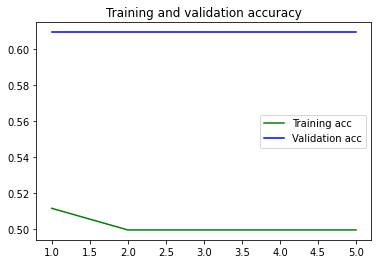

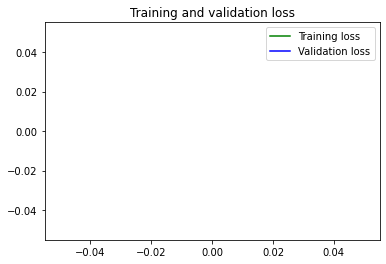

In [13]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()